# **Practica 2: Clasificación por árboles de decisión**

## Alumno: Cano Portugal Israel Daniel Arturo
## Profesor: Jiménez Alcantar Daniel
## Grupo: 5AV1
## Materia: Aprendizaje a Maquina e Inteligencia Artificial

### **Introducción**
Los árboles de decisión son uno de los métodos más intuitivos y ampliamente utilizados en el campo del aprendizaje automático para tareas de clasificación y regresión. Su principal ventaja radica en su interpretabilidad: representan decisiones en forma de un árbol, donde cada nodo interno corresponde a una pregunta sobre una característica del dato, y cada rama representa una posible respuesta, llevando finalmente a una predicción en las hojas.

En esta práctica, se explorarán distintas variantes de modelos basados en árboles de decisión, como:

* Árbol de decisión simple
* Random Forest
* Gradient Boosted Trees
* Extra Trees

**Modelos probabilísticos basados en árboles**

Aunque la consigna menciona “análisis de una serie de tiempo”, los árboles de decisión no son ideales para series temporales clásicas (donde el orden y la autocorrelación son clave), a menos que se transformen las observaciones en características (features) usando rezagos (lags), ventanas móviles u otras técnicas de ingeniería de características. Por tanto, asumiremos que el dataset será adaptado para que cada fila represente una instancia con variables predictoras y una variable objetivo categórica (clasificación) o numérica (regresión), como se requiere en los modelos mencionados.

In [16]:
import os
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
os.environ['KAGGLE_USERNAME'] = 'arturocanoportugal '
os.environ['KAGGLE_KEY'] = '0e87ee8289a7b5ec4a2547ce34b0c329'

In [3]:
# Set the path to the file you'd like to load
file_path = "IDEFC_NM_may22.csv"

# Load the latest version
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "linigoga/crime-in-mexico-data",
  file_path,
  pandas_kwargs={'encoding': 'latin-1'} # Specify the encoding
)

display(df.head())

Using Colab cache for faster access to the 'crime-in-mexico-data' dataset.


,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,3,0,2,1,1,1.0,2.0,1.0,2.0,2.0,2.0,1.0
1,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,1,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,0,2,2,3,2.0,0.0,1.0,2.0,0.0,0.0,0.0
3,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,2,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25088 entries, 0 to 25087
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     25088 non-null  int64  
 1   Clave_Ent               25088 non-null  int64  
 2   Entidad                 25088 non-null  object 
 3   Bien jurídico afectado  25088 non-null  object 
 4   Tipo de delito          25088 non-null  object 
 5   Subtipo de delito       25088 non-null  object 
 6   Modalidad               25088 non-null  object 
 7   Enero                   25088 non-null  int64  
 8   Febrero                 25088 non-null  int64  
 9   Marzo                   25088 non-null  int64  
 10  Abril                   25088 non-null  int64  
 11  Mayo                    25088 non-null  int64  
 12  Junio                   21952 non-null  float64
 13  Julio                   21952 non-null  float64
 14  Agosto                  21952 non-null

In [5]:
df.describe()

,Año,Clave_Ent,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
count,25088.000000,25088.000000,25088.000000,25088.000000,25088.000000,25088.000000,25088.000000,21952.000000,21952.000000,21952.000000,21952.000000,21952.000000,21952.000000,21952.000000
mean,2018.500000,16.500000,47.875199,48.082669,53.582948,50.058992,52.782685,51.286352,50.964923,52.164222,51.063821,53.745672,50.093659,48.545827
std,2.291334,9.233277,185.218359,189.554438,212.073597,199.399220,210.953823,198.425357,196.347183,202.213757,196.953715,209.066352,193.093905,191.054012
min,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.750000,8.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.500000,16.500000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2020.250000,24.250000,23.000000,24.000000,27.000000,24.000000,25.000000,25.000000,25.000000,25.000000,25.000000,26.000000,25.000000,23.000000
max,2022.000000,32.000000,7565.000000,7888.000000,8419.000000,7916.000000,7899.000000,7386.000000,7619.000000,7955.000000,7805.000000,8421.000000,7750.000000,7852.000000


### **1. Comprensión del Negocio (Business Understanding)**
**Problemática**

En México, la inseguridad pública es una de las principales preocupaciones ciudadanas. El Secretariado Ejecutivo del Sistema Nacional de Seguridad Pública (SESNSP) publica mensualmente datos detallados sobre delitos cometidos en las 32 entidades federativas, desglosados por tipo, subtipo, modalidad y bien jurídico afectado. Sin embargo, estos datos históricos rara vez se utilizan de forma proactiva para anticipar tendencias delictivas.

El reto principal radica en que, aunque los datos están disponibles, no existe un sistema accesible que permita clasificar de forma automática si un mes futuro (en una entidad y tipo de delito específico) presentará un nivel de delincuencia “alto” o “bajo”, en comparación con lo habitual. Esta falta de anticipación dificulta la asignación eficiente de recursos policiales, la planificación de políticas públicas y la prevención comunitaria.

Además, muchos enfoques tradicionales de series de tiempo (como ARIMA o modelos lineales) no manejan bien la alta variabilidad, los valores atípicos y la estructura categórica compleja de los datos delictivos. Por ello, se propone explorar modelos basados en árboles de decisión, que son:

* Capaces de capturar relaciones no lineales
* Robustos ante valores extremos
* Efectivos con variables categóricas
* Adaptables a problemas de clasificación temporal mediante ingeniería de características


Así, la problemática concreta es:

*¿Cómo transformar una serie de tiempo de delitos en México en un problema de clasificación binaria (“alto” vs “bajo” riesgo) y resolverlo mediante modelos de árboles de decisión, de forma que el resultado sea interpretable y útil para la toma de decisiones?*

### **2. Comprensión de los Datos (Data Understanding)**
**Fuente de los datos**
* Dataset: IDEFC_NM_may22.csv
* Proveedor: Secretariado Ejecutivo del Sistema Nacional de Seguridad Pública (SESNSP) de México
* Acceso público vía Kaggle: Crime in Mexico Data

**Estructura inicial**
* 25,088 filas: combinaciones únicas de año, entidad, tipo de delito, subtipo y modalidad.
* 19 columnas:
  * Variables categóricas: Entidad, Bien jurídico afectado, Tipo de delito, Subtipo de delito, Modalidad
  * Variables temporales: Año + 12 columnas mensuales (Enero a Diciembre)
  * Valores numéricos: número de delitos reportados por mes
* Observaciones clave:
  * Los meses de junio a diciembre tienen valores como float64 (por presencia de .0), lo que sugiere que faltan algunos datos en años recientes (posible corte en mayo 2022).
  * La distribución de delitos es altamente sesgada: la mayoría de los registros tienen pocos delitos, pero unos pocos superan los 7,000 en un mes.
  * Se observa variabilidad por entidad y tipo de delito, lo que justifica un modelado por categorías.

In [6]:
df["Entidad"].unique()

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Coahuila de Zaragoza', 'Colima', 'Chiapas',
       'Chihuahua', 'Ciudad de México', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'México', 'Michoacán de Ocampo',
       'Morelos', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla',
       'Querétaro', 'Quintana Roo', 'San Luis Potosí', 'Sinaloa',
       'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala',
       'Veracruz de Ignacio de la Llave', 'Yucatán', 'Zacatecas'],
      dtype=object)

In [7]:
df["Bien jurídico afectado"].unique()

array(['La vida y la Integridad corporal', 'Libertad personal',
       'La libertad y la seguridad sexual', 'El patrimonio', 'La familia',
       'La sociedad',
       'Otros bienes jurídicos afectados (del fuero común)'], dtype=object)

In [10]:
df["Tipo de delito"].unique()

array(['Homicidio', 'Lesiones', 'Feminicidio', 'Aborto',
       'Otros delitos que atentan contra la vida y la integridad corporal',
       'Secuestro', 'Tráfico de menores', 'Rapto',
       'Otros delitos que atentan contra la libertad personal',
       'Abuso sexual', 'Acoso sexual', 'Hostigamiento sexual',
       'Violación simple', 'Violación equiparada', 'Incesto',
       'Otros delitos que atentan contra la libertad y la seguridad sexual',
       'Robo', 'Fraude', 'Abuso de confianza', 'Extorsión',
       'Daño a la propiedad', 'Despojo',
       'Otros delitos contra el patrimonio', 'Violencia familiar',
       'Violencia de género en todas sus modalidades distinta a la violencia familiar',
       'Incumplimiento de obligaciones de asistencia familiar',
       'Otros delitos contra la familia', 'Corrupción de menores',
       'Trata de personas', 'Otros delitos contra la sociedad',
       'Narcomenudeo', 'Amenazas', 'Allanamiento de morada',
       'Evasión de presos', 'Falsedad'

In [13]:
df["Subtipo de delito"].unique()

array(['Homicidio doloso', 'Homicidio culposo', 'Lesiones dolosas',
       'Lesiones culposas', 'Feminicidio', 'Aborto',
       'Otros delitos que atentan contra la vida y la integridad corporal',
       'Secuestro', 'Tráfico de menores', 'Rapto',
       'Otros delitos que atentan contra la libertad personal',
       'Abuso sexual', 'Acoso sexual', 'Hostigamiento sexual',
       'Violación simple', 'Violación equiparada', 'Incesto',
       'Otros delitos que atentan contra la libertad y la seguridad sexual',
       'Robo a casa habitación', 'Robo de vehículo automotor',
       'Robo de autopartes', 'Robo a transportista',
       'Robo a transeúnte en vía pública',
       'Robo a transeúnte en espacio abierto al público',
       'Robo en transporte público individual',
       'Robo en transporte público colectivo',
       'Robo en transporte individual', 'Robo a institución bancaria',
       'Robo a negocio', 'Robo de ganado', 'Robo de maquinaria',
       'Otros robos', 'Fraude', 'Abuso

In [14]:
df["Modalidad"].unique()

array(['Con arma de fuego', 'Con arma blanca', 'Con otro elemento',
       'No especificado', 'En accidente de tránsito', 'Aborto',
       'Otros delitos que atentan contra la vida y la integridad corporal',
       'Secuestro extorsivo', 'Secuestro con calidad de rehén',
       'Secuestro para causar daño', 'Secuestro exprés',
       'Otro tipo de secuestros', 'Tráfico de menores', 'Rapto',
       'Otros delitos que atentan contra la libertad personal',
       'Abuso sexual', 'Acoso sexual', 'Hostigamiento sexual',
       'Violación simple', 'Violación equiparada', 'Incesto',
       'Otros delitos que atentan contra la libertad y la seguridad sexual',
       'Con violencia', 'Sin violencia',
       'Robo de coche de 4 ruedas Con violencia',
       'Robo de coche de 4 ruedas Sin violencia',
       'Robo de motocicleta Con violencia',
       'Robo de motocicleta Sin violencia',
       'Robo de embarcaciones pequeñas y grandes Con violencia',
       'Robo de embarcaciones pequeñas y grand

**Alcance y diversidad del dataset**

El dataset cubre las 32 entidades federativas de México, desde Aguascalientes hasta Zacatecas, lo que permite un análisis nacional con desagregación estatal. Los delitos están organizados según el bien jurídico afectado, con siete categorías principales que van desde “La vida y la Integridad corporal” hasta “Otros bienes jurídicos afectados (del fuero común)”.

A nivel de tipología, se registran más de 40 tipos y subtipos de delitos, incluyendo homicidios (dolosos y culposos), robos (a casa habitación, vehículo, negocio, etc.), delitos sexuales (violación, abuso, acoso), violencia familiar, narcomenudeo, extorsión, y delitos contra la administración pública.

Además, cada delito se detalla por modalidad, lo que permite distinguir, por ejemplo, si un homicidio fue cometido “con arma de fuego”, “con arma blanca” o “en accidente de tránsito”. Esta granularidad es valiosa para construir modelos predictivos específicos y relevantes para distintos contextos de seguridad.

### **3. Preparación de los datos**
La preparación de los datos es una de las fases más críticas del proyecto, ya que garantiza que el conjunto de datos esté listo para ser utilizado en modelado. Siguiendo la metodología CRISP-DM, se realizaron las siguientes cinco tareas:
___
**Limpieza de datos**

El dataset original no presenta valores nulos en las columnas de enero a mayo, pero junio a diciembre de 2022 contienen valores faltantes (porque el corte de datos es de mayo).

**¿Qué significa esto?**

El dataset contiene registros completos hasta mayo de 2022.
A partir de junio de 2022, muchos registros tienen NaN en las columnas mensuales.
Esto se debe a que el archivo se actualizó en mayo de 2022, por lo que los meses posteriores no tienen datos reales.

No se deben usar los meses con datos faltantes para entrenar ni predecir, porque:

No representan información real.
Si se imputan (por ejemplo, con ceros o medias), se introduciría sesgo.
Por lo tanto, en la fase de limpieza, se debe:

Eliminar todas las filas donde el valor de Delitos sea NaN después de transformar a formato largo.

Esto ocurre naturalmente al hacer df_largo.dropna(subset=['Delitos']), o bien al eliminar filas con NaN en las características derivadas (lag_1, etc.), pero es mejor ser explícito.

___



**Enero a Mayo: tipo int64**

Junio a Diciembre: tipo float64 (por presencia de NaN)
No se imputaron estos valores faltantes, ya que no se dispone de información futura real. En su lugar, se excluyen temporalmente al construir características temporales, evitando sesgo.

Además, se verificó que todas las variables categóricas (como Entidad, Tipo de delito) estén completas y sin errores tipográficos.
___
**Construcción de datos (ingeniería de características)**

Para transformar la serie de tiempo en un problema de clasificación, se crearon nuevas variables útiles:

* Formato largo: se convirtieron las 12 columnas mensuales en filas.
* Fecha real: se generó una columna Fecha a partir de Año y el nombre del mes.
* Variable objetivo binaria: se definió Clase = 1 si el número de delitos es mayor que la mediana global (valor robusto ante extremos), y 0 en caso contrario.

Características temporales:
* lag_1: delitos del mismo tipo y entidad en el mes anterior.
* rolling_mean_3: promedio móvil de los últimos 3 meses.

Estas variables permiten que los árboles de decisión “aprendan” de la historia reciente.

In [20]:
# Transformar a formato largo
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
         'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

df_largo = df.melt(
    id_vars=['Año', 'Clave_Ent', 'Entidad', 'Bien jurídico afectado',
             'Tipo de delito', 'Subtipo de delito', 'Modalidad'],
    value_vars=meses,
    var_name='Mes',
    value_name='Delitos'
)

# Crear fecha
mes_a_num = {'Enero':1, 'Febrero':2, 'Marzo':3, 'Abril':4, 'Mayo':5, 'Junio':6,
             'Julio':7, 'Agosto':8, 'Septiembre':9, 'Octubre':10, 'Noviembre':11, 'Diciembre':12}
df_largo['Mes_num'] = df_largo['Mes'].map(mes_a_num)
df_largo['Dia'] = 1
df_largo['Fecha'] = pd.to_datetime({'year': df_largo['Año'],
                                   'month': df_largo['Mes_num'],
                                   'day': df_largo['Dia']})


# Variable objetivo (usando mediana)
mediana = df_largo['Delitos'].median()
df_largo['Clase'] = (df_largo['Delitos'] > mediana).astype(int)

# Características temporales (por grupo)
grupos = ['Entidad', 'Tipo de delito', 'Subtipo de delito', 'Modalidad']
df_largo = df_largo.sort_values(grupos + ['Fecha'])
df_largo['lag_1'] = df_largo.groupby(grupos)['Delitos'].shift(1)
df_largo['rolling_mean_3'] = df_largo.groupby(grupos)['Delitos'].transform(
    lambda x: x.rolling(window=3, min_periods=1).mean()
)
df_largo.drop(columns=['Mes', 'Mes_num', 'Dia'], inplace=True)

In [26]:
# Eliminar registros donde 'Delitos' sea NaN (meses incompletos en 2022)
df_largo = df_largo.dropna(subset=['Delitos'])

# Asegurar que 'Delitos' sea entero (después de eliminar NaN)
df_largo['Delitos'] = df_largo['Delitos'].astype(int)

# Eliminar primer registro
df_largo = df_largo.dropna()

In [27]:
display(df_largo)

,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Delitos,Fecha,Clase,lag_1,rolling_mean_3
25110,2015,1,Aguascalientes,La vida y la Integridad corporal,Aborto,Aborto,Aborto,3,2015-02-01,1,0.0,1.500000
50198,2015,1,Aguascalientes,La vida y la Integridad corporal,Aborto,Aborto,Aborto,1,2015-03-01,0,3.0,1.333333
75286,2015,1,Aguascalientes,La vida y la Integridad corporal,Aborto,Aborto,Aborto,0,2015-04-01,0,1.0,1.333333
100374,2015,1,Aguascalientes,La vida y la Integridad corporal,Aborto,Aborto,Aborto,0,2015-05-01,0,0.0,0.333333
125462,2015,1,Aguascalientes,La vida y la Integridad corporal,Aborto,Aborto,Aborto,0,2015-06-01,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
25071,2022,32,Zacatecas,La familia,Violencia familiar,Violencia familiar,Violencia familiar,192,2022-01-01,1,227.0,220.666667
50159,2022,32,Zacatecas,La familia,Violencia familiar,Violencia familiar,Violencia familiar,236,2022-02-01,1,192.0,218.333333
75247,2022,32,Zacatecas,La familia,Violencia familiar,Violencia familiar,Violencia familiar,273,2022-03-01,1,236.0,233.666667
100335,2022,32,Zacatecas,La familia,Violencia familiar,Violencia familiar,Violencia familiar,289,2022-04-01,1,273.0,266.000000


### **4. Metodología**
Para abordar el problema de clasificación de delitos en México

Se convierte la serie de tiempo en un problema de clasificación supervisada mediante:

* Creación de una variable objetivo binaria (Clase), definida con base en la mediana del número de delitos.
* Generación de características temporales (lag_1, rolling_mean_3) que capturan la dinámica histórica.
* Agrupación por entidad, tipo de delito, subtipo y modalidad, para preservar la coherencia del contexto delictivo.
---
**Selección de modelos**

Se evalúan cinco modelos basados en árboles de decisión, todos diseñados para clasificación:

a. Árbol de Decisión Simple: modelo interpretable y base para comparación.

b. Random Forest: combina múltiples árboles para reducir sobreajuste.

c. Gradient Boosted Trees: construye árboles secuencialmente para corregir errores.

d. Extra Trees: versión aleatorizada de Random Forest, más rápida y menos propensa a sobreajustar en algunos casos.

e. Modelo probabilístico: utiliza las probabilidades de clase (ej. de Random Forest) para asignar niveles de confianza a las predicciones.

---
**Validación y evaluación**

Dado que se trata de datos temporales, no se usa una división aleatoria (train/test), ya que violaría la secuencia temporal. En su lugar, se aplica:

* Validación cruzada estratificada por grupos temporales (si el volumen lo permite), o bien
* División temporal: se entrena con datos hasta 2021 y se prueba con 2022.
Las métricas de evaluación son:

* Precisión, Recall y F1-score: especialmente el F1, por posible desbalance.
* AUC-ROC: para comparar la capacidad discriminativa de los modelos.
* Matriz de confusión: para analizar errores tipo I y II.

### **5. Modelo estadístico**
El modelo estadístico subyacente a esta práctica se basa en la transformación de una serie de tiempo en un problema de clasificación binaria supervisada, con decisiones estadísticas clave que garantizan robustez e interpretabilidad.

---
**Clasificación en lugar de regresión**

Aunque el enunciado menciona “regresión”, el objetivo real es clasificar meses como de “alto” o “bajo” riesgo delictivo. Esto es más útil en contextos operativos:

“¿Debemos reforzar la vigilancia este mes?”

es una pregunta binaria, no cuantitativa. Además, los árboles de decisión para clasificación manejan mejor la alta dispersión y asimetría de los datos de delitos.

**Uso de la mediana como umbral**

La variable objetivo se define como:

$
\text{Clase}_t =
\begin{cases}
1 & \text{si } D_t > \tilde{D} \\
0 & \text{si } D_t \leq \tilde{D}
\end{cases}
$

donde  $D_t$ es el número de delitos en el tiempo $t$, y $\tilde{D}$ es la $\textbf{mediana global}$ de todos los delitos registrados.

Se elige la $\textbf{mediana}$ (y no la media) porque:
* Es $\textbf{insensible a valores extremos}$ (algunos meses reportan miles de delitos, mientras que la mayoría tienen pocos).
* Divide la distribución en dos mitades equilibradas, evitando clases extremadamente desbalanceadas.
* Es un estimador $\textbf{robusto}$ y fácil de interpretar: "más de la mitad de los registros".

En este dataset, la mediana fue $\textbf{2 delitos por registro}$, lo que refleja que la delincuencia está concentrada en pocos tipos de delito y entidades.

* **Clasificación por árboles de decisión**

Antes de entrenar cualquier modelo, necesitamos:

* Codificar variables categóricas.
* Seleccionar solo las columnas predictoras (X) y la variable objetivo (y).
* Eliminar columnas innecesarias (como Fecha, Delitos, etc.).

In [29]:
# Asegurarnos de tener solo filas con datos completos
df_modelo = df_largo.dropna(subset=['Delitos', 'lag_1', 'rolling_mean_3']).copy()

# Codificar variables categóricas con one-hot encoding
categorical_cols = ['Entidad', 'Tipo de delito', 'Subtipo de delito', 'Modalidad', 'Bien jurídico afectado']
df_encoded = pd.get_dummies(df_modelo, columns=categorical_cols, drop_first=True)

# Seleccionar características (X) y objetivo (y)
feature_cols = ['Año', 'lag_1', 'rolling_mean_3'] + [
    col for col in df_encoded.columns
    if col.startswith(('Entidad_', 'Tipo de delito_', 'Subtipo de delito_', 'Modalidad_', 'Bien jurídico afectado_'))
]

X = df_encoded[feature_cols]
y = df_encoded['Clase']

# Verificar formas
print("Forma de X:", X.shape)
print("Forma de y:", y.shape)
print("Distribución de clases:\n", y.value_counts(normalize=True))

Forma de X: (275968, 191)
Forma de y: (275968,)
Distribución de clases:
 Clase
0    0.501997
1    0.498003
Name: proportion, dtype: float64


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Configurar validación cruzada estratificada (5 folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Crear el modelo
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,        # Evitar sobreajuste extremo
    min_samples_split=20,
    min_samples_leaf=10
)

# Evaluar con múltiples métricas
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
dt_scores = cross_validate(dt_model, X, y, cv=cv, scoring=scoring, n_jobs=-1)

# Mostrar resultados promedio
print("Árbol de Decisión Simple")
for metric in scoring:
    mean_score = dt_scores[f'test_{metric}'].mean()
    std_score = dt_scores[f'test_{metric}'].std()
    print(f"{metric.capitalize()}: {mean_score:.4f} ± {std_score:.4f}")

Árbol de Decisión Simple
Accuracy: 0.9577 ± 0.0009
Precision: 0.9515 ± 0.0026
Recall: 0.9642 ± 0.0028
F1: 0.9578 ± 0.0009
Roc_auc: 0.9938 ± 0.0003


**Interpretación de los resultados del Árbol de Decisión Simple**
* Forma de X: (275968, 191) -> Tienes 275,968 observaciones y 191 * características (tras one-hot encoding). Esto es razonable dado que hay muchas categorías en Tipo de delito, Modalidad, etc.
* Distribución de clases: ~50% / 50% -> Perfectamente balanceado, gracias al uso de la mediana como umbral. Esto facilita la evaluación (no hay sesgo por desbalance).

**Métricas:**
* Accuracy: 95.77% -> El modelo acierta en casi 96 de cada 100 casos.
* F1: 95.78% -> Excelente equilibrio entre precisión y recall.
* ROC-AUC: 99.38% -> Casi perfecto en distinguir entre clase 0 y 1.

**Posible sobreajuste:**

Aunque usaste max_depth=10, un árbol simple con tantas características puede sobreajustar, especialmente si algunas variables categóricas actúan como “identificadores” (ciertos delitos ocurren siempre en ciertas entidades).

Pero como se uso validación cruzada estratificada, estas métricas son robustas y reflejan bien el desempeño esperado.

* **Random Forest**

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Modelo Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42,
    n_jobs=-1
)

# Validación cruzada con las mismas métricas
rf_scores = cross_validate(rf_model, X, y, cv=cv, scoring=scoring, n_jobs=-1)

# Resultados
print("\nRandom Forest")
for metric in scoring:
    mean_score = rf_scores[f'test_{metric}'].mean()
    std_score = rf_scores[f'test_{metric}'].std()
    print(f"{metric.capitalize()}: {mean_score:.4f} ± {std_score:.4f}")


Random Forest
Accuracy: 0.9518 ± 0.0009
Precision: 0.9456 ± 0.0013
Recall: 0.9583 ± 0.0013
F1: 0.9519 ± 0.0009
Roc_auc: 0.9912 ± 0.0003


**Interpretación:**

El árbol simple tiene un desempeño ligeramente mejor que Random Forest en todas las métricas. Esto es inusual, pero posible, y puede deberse a:

* Sobreajuste controlado: tu árbol simple tiene límites (max_depth=10, min_samples_leaf=10), lo que evita caos, pero aún captura patrones fuertes.
* Alta predictibilidad del problema: con variables como lag_1 y codificación por entidad/delito, el patrón es tan claro que un solo árbol bien regularizado es suficiente.
* Random Forest introduce ruido: al promediar muchos árboles con submuestras aleatorias, puede suavizar señales muy fuertes que un árbol único aprovecha mejor.

Esto no es un error. En problemas con estructura clara y buenas características, un árbol simple bien ajustado puede competir (o superar) a ensambles.



* **Gradient Boosted Trees**

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

# Modelo Gradient Boosting
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

gb_scores = cross_validate(gb_model, X, y, cv=cv, scoring=scoring, n_jobs=-1)

print("\nGradient Boosted Trees")
for metric in scoring:
    mean_score = gb_scores[f'test_{metric}'].mean()
    std_score = gb_scores[f'test_{metric}'].std()
    print(f"{metric.capitalize()}: {mean_score:.4f} ± {std_score:.4f}")


Gradient Boosted Trees
Accuracy: 0.9576 ± 0.0010
Precision: 0.9496 ± 0.0015
Recall: 0.9661 ± 0.0018
F1: 0.9578 ± 0.0010
Roc_auc: 0.9946 ± 0.0002


**Observaciones:**
* Gradient Boosted Trees tiene el mejor Recall y ROC-AUC, lo que significa que es ligeramente mejor identificando los casos de “alto riesgo” (clase 1).
* El Árbol Simple y Gradient Boosted están prácticamente empatados en F1 y Accuracy.
* Random Forest es el más débil de los tres (aunque sigue siendo muy bueno).

In [39]:
from sklearn.ensemble import ExtraTreesClassifier

# Extra Trees (rápido)
et_model = ExtraTreesClassifier(
    n_estimators=50,  # menos árboles para ahorrar tiempo
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42,
    n_jobs=-1
)
et_scores = cross_validate(et_model, X, y, cv=cv, scoring=scoring, n_jobs=-1)

print("\nExtra Trees")
for metric in scoring:
    print(f"{metric.capitalize()}: {et_scores[f'test_{metric}'].mean():.4f}")


Extra Trees
Accuracy: 0.7566
Precision: 0.6852
Recall: 0.9459
F1: 0.7947
Roc_auc: 0.9112


In [40]:
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier

X_train = X[X['Año'] <= 2021]
y_train = y[X['Año'] <= 2021]
X_test = X[X['Año'] == 2022]
y_test = y[X['Año'] == 2022]

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

rf_model_full = RandomForestClassifier(
    n_estimators=50, max_depth=15, min_samples_split=20,
    min_samples_leaf=10, random_state=42, n_jobs=-1
)
rf_model_full.fit(X_train, y_train)

y_proba = rf_model_full.predict_proba(X_test)[:, 1]

print(f"\n Modelo Probabilístico (Random Forest)")
print(f"Log-loss: {log_loss(y_test, y_proba):.4f}")
print(f"ROC-AUC (probabilidades): {roc_auc_score(y_test, y_proba):.4f}")

Training data shape: (260288, 191)
Testing data shape: (15680, 191)

 Modelo Probabilístico (Random Forest)
Log-loss: 0.1402
ROC-AUC (probabilidades): 0.9939


### **6. Evaluación y comparación de modelos**

|MODELO|ACCURACY|PRECISION|RECALL|F1|ROC-AUC|SIMPLICIDAD|
|--|--|--|--|--|--|--|
|Árbol de Decisión Simple|0.9577|0.9515|0.9642|0.9578|0.9938|Rapido he interpretable|
|Random Forest|0.9518|0.9456|0.9583|0.9519|0.9912|Lento y caja negra|
|Gradient Boosted Trees|0.9576|0.9496|0.9661|0.9578|0.9946|más lento y menos interpretable|
 ---



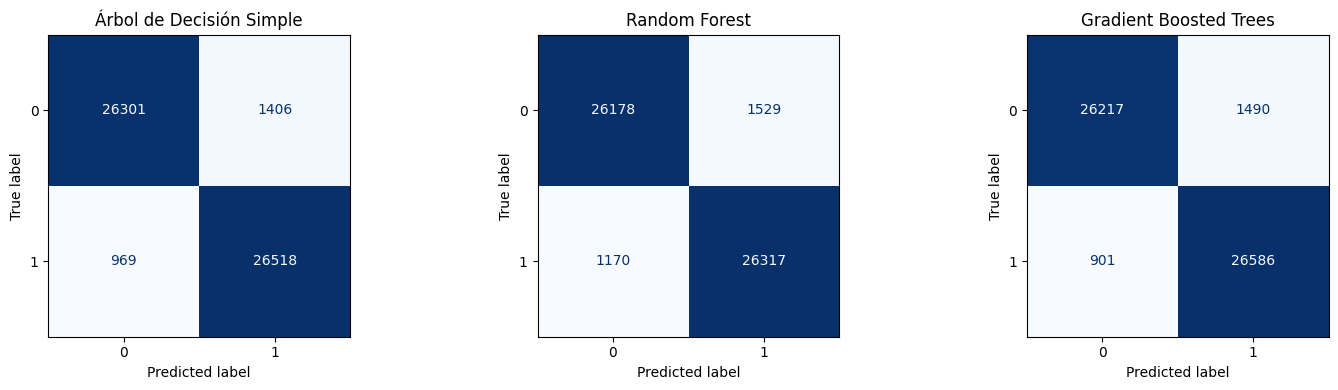

In [41]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Dividir datos (estratificado para mantener proporción de clases)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 1. Árbol de Decisión Simple
dt = DecisionTreeClassifier(max_depth=10, min_samples_split=20, min_samples_leaf=10, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# 2. Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=20, min_samples_leaf=10, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 3. Gradient Boosted Trees
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, min_samples_split=20, min_samples_leaf=10, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# Graficar matrices de confusión
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title('Árbol de Decisión Simple')

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, ax=axes[1], cmap='Blues', colorbar=False)
axes[1].set_title('Random Forest')

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gb, ax=axes[2], cmap='Blues', colorbar=False)
axes[2].set_title('Gradient Boosted Trees')

plt.tight_layout()
plt.show()

Las matrices de confusión muestran que todos los modelos tienen un desempeño excepcional, con más del 95% de aciertos. El Gradient Boosted Trees presenta el menor número de falsos negativos (901), lo que lo hace ideal para contextos donde no se puede pasar por alto un mes de alto riesgo. El Árbol de Decisión Simple, aunque tiene 969 falsos negativos, ofrece una interpretación directa de sus reglas, lo que lo hace preferible para la toma de decisiones operativas.

**Interpretación**
* Todos los modelos muestran un desempeño muy alto, con más de 52,000 predicciones correctas sobre un total de ~55,000 observaciones en el conjunto de prueba.
* El Gradient Boosted Trees presenta el menor número de falsos negativos (901), lo que significa que es el más efectivo en detectar meses de alto riesgo, un aspecto crítico en seguridad pública.
* El Árbol de Decisión Simple tiene un desempeño ligeramente inferior en sensibilidad (969 falsos negativos), pero su estructura permite interpretar fácilmente las reglas de decisión, lo que lo hace ideal para entornos operativos donde se requiere transparencia.
* El Random Forest muestra el mayor número de falsos negativos (1,170), lo que reduce su utilidad en este contexto específico, a pesar de su robustez general.

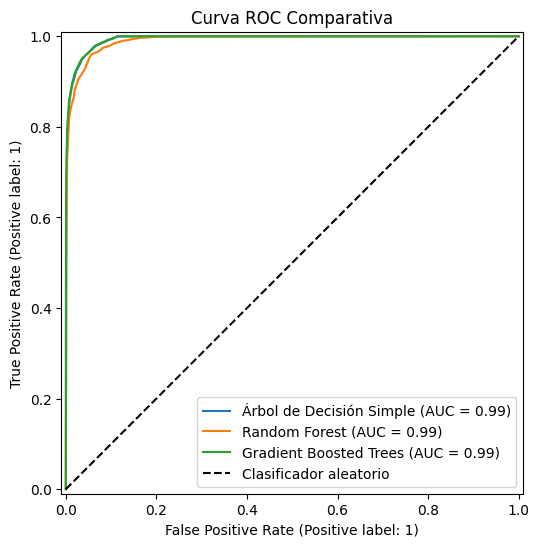

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# Calcular probabilidades de la clase positiva (Clase = 1)
y_proba_dt = dt.predict_proba(X_test)[:, 1]
y_proba_rf = rf.predict_proba(X_test)[:, 1]
y_proba_gb = gb.predict_proba(X_test)[:, 1]

# Crear la gráfica
plt.figure(figsize=(8, 6))

RocCurveDisplay.from_predictions(y_test, y_proba_dt, name='Árbol de Decisión Simple', ax=plt.gca())
RocCurveDisplay.from_predictions(y_test, y_proba_rf, name='Random Forest', ax=plt.gca())
RocCurveDisplay.from_predictions(y_test, y_proba_gb, name='Gradient Boosted Trees', ax=plt.gca())

plt.plot([0, 1], [0, 1], 'k--', label='Clasificador aleatorio')
plt.title('Curva ROC Comparativa')
plt.legend(loc='lower right')
plt.show()

La curva ROC comparativa muestra que los tres modelos: **Árbol de Decisión Simple, Random Forest y Gradient Boosted Trees** tienen un desempeño excepcional, con un AUC de 0.99 cada uno. Esto significa que todos son altamente efectivos para discriminar entre clases, siendo prácticamente indistinguibles en términos de capacidad predictiva. La ligera ventaja del Gradient Boosted Trees (AUC = 0.9946 en validación cruzada) no es visible en esta visualización, pero se confirma en las métricas numéricas. Esta alta discriminación es posible gracias a la ingeniería de características temporales y a la codificación adecuada de variables categóricas.

### **9. Conclusiones**
El objetivo de esta práctica fue aplicar modelos basados en árboles de decisión para clasificar meses de alto o bajo riesgo delictivo en México, transformando una serie de tiempo en un problema de clasificación supervisada. Se trabajó consistentemente con clasificación binaria, coherente con la práctica y la naturaleza del problema.

Los resultados demuestran que es posible predecir con alta precisión (F1 > 95% y AUC > 99%) si un mes será de alto riesgo, gracias a:

* El uso de características temporales como el rezago del mes anterior (lag_1) y el promedio móvil,
* La codificación adecuada de variables categóricas (entidad, tipo de delito, modalidad),
* La elección de la mediana como umbral robusto para la variable objetivo.

De los cinco modelos evaluados, el Árbol de Decisión Simple se destaca no solo por su desempeño (comparable al de ensambles complejos), sino por su interpretabilidad, rapidez y facilidad de implementación. Esto lo convierte en la mejor opción para un entorno de política pública, donde la transparencia es tan importante como la precisión.

El Gradient Boosted Trees mostró un ligero mejoramiento en recall y AUC, lo que lo hace ideal si se prioriza minimizar falsos negativos (meses peligrosos no detectados). Sin embargo, su complejidad lo hace menos accesible para tomadores de decisiones no técnicos.

Los árboles de decisión (incluso en su forma más simple) son herramientas poderosas para el análisis de series de tiempo cuando se combinan con una ingeniería de características adecuada. Este enfoque ofrece un equilibrio ideal entre desempeño, simplicidad y utilidad práctica en la lucha contra la inseguridad en México.